In [ ]:
!pip install ucimlrepo

In [ ]:
# Cargando las librerias
import os          #funciones para interactuar con el sistema operativo
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo #Nos deja acceder a un repositorio de datasets de UCI Machine Learning Repository para descargar datos.

import yaml #archivos en formato YAML


import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para preprocesamiento e ing de características
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Librerías para la canalizacion
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imblearnPipeline

# Librerías para la regresion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import metrics

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance


**Student ID**

**1- Student Age**

(1: 18-21,

2: 22-25,

3: above 26)

**2- Sex**

(1: female,

2: male)

**3- Graduated high-school type:**

(1: private,

2: state,

3: other)

**4- Scholarship type:**

(1: None,

2: 25%,

3: 50%,

4: 75%,

5: Full)

**5- Additional work:**

(1: Yes,

2: No)

**6- Regular artistic or sports activity:**

(1: Yes,

2: No)

**7- Do you have a partner:**

(1: Yes,

2: No)

**8- Total salary if available**

(1: USD 135-200,

2: USD 201-270,

3: USD 271-340,

4: USD 341-410,

5: above 410)

**9- Transportation to the university:**

(1: Bus,

2: Private car/taxi,

3: bicycle,

4: Other)

**10- Accommodation type in Cyprus:**

(1: rental,

2: dormitory,

3: with family,

4: Other)

**11- Mothers education:**

(1: primary school,

2: secondary school,

3: high school,

4: university,

5: MSc.,

6: Ph.D.)

**12- Fathers education:**

(1: primary school,

2: secondary school,

3: high school,

4: university,

5: MSc.,

6: Ph.D.)

**13- Number of sisters/brothers (if available):**

(1: 1,

2:, 2,

3: 3,

4: 4,

5: 5 or above)

**14- Parental status:**

(1: married,

2: divorced,

3: died - one of them or both)

**15- Mothers occupation:**

(1: retired,

2: housewife,

3: government officer,

4: private sector employee,

5: self-employment,

6: other)

**16- Fathers occupation:**

(1: retired,

2: government officer,

3: private sector employee,

4: self-employment,

5: other)

**17- Weekly study hours:**

(1: None,

2: <5 hours,

3: 6-10 hours,

4: 11-20 hours,

5: more than 20 hours)

**18- Reading frequency (non-scientific books/journals):**

(1: None,

2: Sometimes,

3: Often)

**19- Reading frequency (scientific books/journals):**

(1: None,

2: Sometimes,

3: Often)

**20- Attendance to the seminars/conferences related to the department:**

(1: Yes,

2: No)

**21- Impact of your projects/activities on your success:**

(1: positive,

2: negative,

3: neutral)

**22- Attendance to classes**

(1: always,

2: sometimes,

3: never)

**23- Preparation to midterm exams 1:**

(1: alone,

2: with friends,

3: not applicable)

**24- Preparation to midterm exams 2:**

(1: closest date to the exam,

2: regularly during the semester,

3: never)

**25- Taking notes in classes:**

(1: never,

2: sometimes,

3: always)

**26- Listening in classes:**

(1: never,

2: sometimes,

3: always)

**27- Discussion improves my interest and success in the course:**

(1: never,

2: sometimes,

3: always)

**28- Flip-classroom:**

(1: not useful,

2: useful,

3: not applicable)

**29- Cumulative grade point average in the last semester (/4.00):**

(1: <2.00,

2: 2.00-2.49,

3: 2.50-2.99,

4: 3.00-3.49,

5: above 3.49)

**30- Expected Cumulative grade point average in the graduation (/4.00):**

(1: <2.00,

2: 2.00-2.49,

3: 2.50-2.99,

4: 3.00-3.49,

5: above 3.49)

**31- Course ID**

**32- OUTPUT Grade**

(0: Fail,

1: DD,

2: DC,

3: CC,

4: CB,

5: BB,

6: BA,

7: AA)

**Variables categoricas nominales (no tienen un orden):**

2- Sex

3- Graduated high-school type

4- Scholarship type

9- Transportation to the university

10- Accommodation type in Cyprus

14- Parental status

15- Mothers occupation

16- Fathers occupation

21- Impact of your projects/activities on your success

22- Attendance to classes

23- Preparation to midterm exams 1

24- Preparation to midterm exams 2

27- Discussion improves my interest and success

28- Flip-classroom

**Variables categricas ordinales:**

1- Student Age

4- Scholarship type

13- Number of sisters/brothers

8- Total salary if available

11- Mothers education

12- Fathers education

17- Weekly study hours

18- Reading frequency (non-scientific books/journals)

19- Reading frequency (scientific books/journals)

25- Taking notes in classes

26- Listening in classes

29- Cumulative grade point average in the last semester

30- Expected Cumulative grade point average in the graduation

**Variables binarias:**

2- Sex

5- Additional work

6- Regular artistic or sports activity

7- Do you have a partner

20- Attendance to the seminars/conferences


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
higher_education_students_performance_evaluation = fetch_ucirepo(id=856)

# data (as pandas dataframes)
X = higher_education_students_performance_evaluation.data.features
y = higher_education_students_performance_evaluation.data.targets


# Concatenamos ambos datasets (feature y target)
df = pd.concat([X, y], axis = 1)
column_names = ['Student Age', 'Sex', 'Graduated High-school Type',
                'Scholarship Type', 'Additional Work', 'Regular Artistic/Sports Activity',
                'Do you have a Partner', 'Total Salary', 'Transportation',
                'Accommodation in Cyprus', 'Mothers Education', 'Fathers Education',
                'Number of Siblings', 'Parental Status', 'Mothers Occupation',
                'Fathers Occupation', 'Weekly Study Hours', 'Reading Frequency (Non-Scientific)',
                'Reading Frequency (Scientific)', 'Attendance to Seminars', 'Impact on Success',
                'Attendance to Classes', 'Preparation to Midterm 1', 'Preparation to Midterm 2',
                'Taking Notes in Classes', 'Listening in Classes',
                'Discussion Improves Success', 'Flip-Classroom',
                'Cumulative GPA Last Semester', 'Expected GPA at Graduation', 'COURSE ID', 'OUTPUT Grade']

df.columns = column_names

df.head(5)

,Student Age,Sex,Graduated High-school Type,Scholarship Type,Additional Work,Regular Artistic/Sports Activity,Do you have a Partner,Total Salary,Transportation,Accommodation in Cyprus,...,Preparation to Midterm 1,Preparation to Midterm 2,Taking Notes in Classes,Listening in Classes,Discussion Improves Success,Flip-Classroom,Cumulative GPA Last Semester,Expected GPA at Graduation,COURSE ID,OUTPUT Grade
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
# Importamos el dataset
#from google.colab import drive
#drive.mount('/content/drive')

#df = data_df = pd.read_csv('/content/drive/MyDrive/MNA/Operaciones_de_aprendizaje_automatico/Data/Higher_Education_Students_Performance_Evaluation.csv')
#df

In [ ]:
#column_names = ['STUDENT ID', 'Student Age', 'Sex', 'Graduated High-school Type',
#                'Scholarship Type', 'Additional Work', 'Regular Artistic/Sports Activity',
#                'Do you have a Partner', 'Total Salary', 'Transportation',
#                'Accommodation in Cyprus', 'Mothers Education', 'Fathers Education',
#                'Number of Siblings', 'Parental Status', 'Mothers Occupation',
#                'Fathers Occupation', 'Weekly Study Hours', 'Reading Frequency (Non-Scientific)',
#                'Reading Frequency (Scientific)', 'Attendance to Seminars', 'Impact on Success',
#                'Attendance to Classes', 'Preparation to Midterm 1', 'Preparation to Midterm 2',
#                'Taking Notes in Classes', 'Listening in Classes',
#                'Discussion Improves Success', 'Flip-Classroom',
#                'Cumulative GPA Last Semester', 'Expected GPA at Graduation', 'COURSE ID', 'OUTPUT Grade']

#df.columns = column_names

#df.head(5)

,STUDENT ID,Student Age,Sex,Graduated High-school Type,Scholarship Type,Additional Work,Regular Artistic/Sports Activity,Do you have a Partner,Total Salary,Transportation,...,Preparation to Midterm 1,Preparation to Midterm 2,Taking Notes in Classes,Listening in Classes,Discussion Improves Success,Flip-Classroom,Cumulative GPA Last Semester,Expected GPA at Graduation,COURSE ID,OUTPUT Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
df.shape

(145, 32)

# Analisis descriptivo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Student Age                         145 non-null    int64
 1   Sex                                 145 non-null    int64
 2   Graduated High-school Type          145 non-null    int64
 3   Scholarship Type                    145 non-null    int64
 4   Additional Work                     145 non-null    int64
 5   Regular Artistic/Sports Activity    145 non-null    int64
 6   Do you have a Partner               145 non-null    int64
 7   Total Salary                        145 non-null    int64
 8   Transportation                      145 non-null    int64
 9   Accommodation in Cyprus             145 non-null    int64
 10  Mothers Education                   145 non-null    int64
 11  Fathers Education                   145 non-null    int64
 12  Number o

In [ ]:
#Aqui podemos observar la media, mediana (cuartil 2nd), min, max desviacion estandar y cuartiles de todas las variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Student Age,145.0,1.620690,0.613154,1.0,1.0,2.0,2.0,3.0
Sex,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
Graduated High-school Type,145.0,1.944828,0.537216,1.0,2.0,2.0,2.0,3.0
Scholarship Type,145.0,3.572414,0.805750,1.0,3.0,3.0,4.0,5.0
Additional Work,145.0,1.662069,0.474644,1.0,1.0,2.0,2.0,2.0
Regular Artistic/Sports Activity,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
Do you have a Partner,145.0,1.579310,0.495381,1.0,1.0,2.0,2.0,2.0
Total Salary,145.0,1.627586,1.020245,1.0,1.0,1.0,2.0,5.0
Transportation,145.0,1.620690,1.061112,1.0,1.0,1.0,2.0,4.0
Accommodation in Cyprus,145.0,1.731034,0.783999,1.0,1.0,2.0,2.0,4.0


In [ ]:
#columns = df.drop('OUTPUT Grade', axis=1).columns

#PENDIENTE REVISAR y AUTOMATIZAR
#columns = ['Student Age']

#plt.figure(figsize=(12, 6))

#for i, column in enumerate(columns, 1): #iterando sobre la lista de columnas
#    plt.subplot(1, 2, i)
#    sns.histplot(df[column], kde=True, edgecolor='black')
#    plt.title(f'{column}')

#plt.tight_layout()
#plt.show()

Nuestros histogramas tienen un sesgo ligero hacia la derecha por lo que seria conveniente realizar una transformacion logaritmica o Box-Cox

In [ ]:
#columns = df.drop('OUTPUT Grade', axis=1).columns


#fig, axes = plt.subplots(4,3, figsize=(15,15))
#axes = axes.ravel()

#for col, ax in zip(df[columns], axes):
#  sns.boxplot(x=df[col], ax=ax) # ---> Seaborn
#  ax.set(xlabel=f'{col}')
#  ax.grid(True)

In [ ]:
#Tcorrelation = df.corr(method='pearson')

#plt.rcParams['figure.figsize'] = (8, 6)
#sns.heatmap(round(Tcorrelation.corr(numeric_only=True),2), annot = True, vmin=-1, vmax=1)

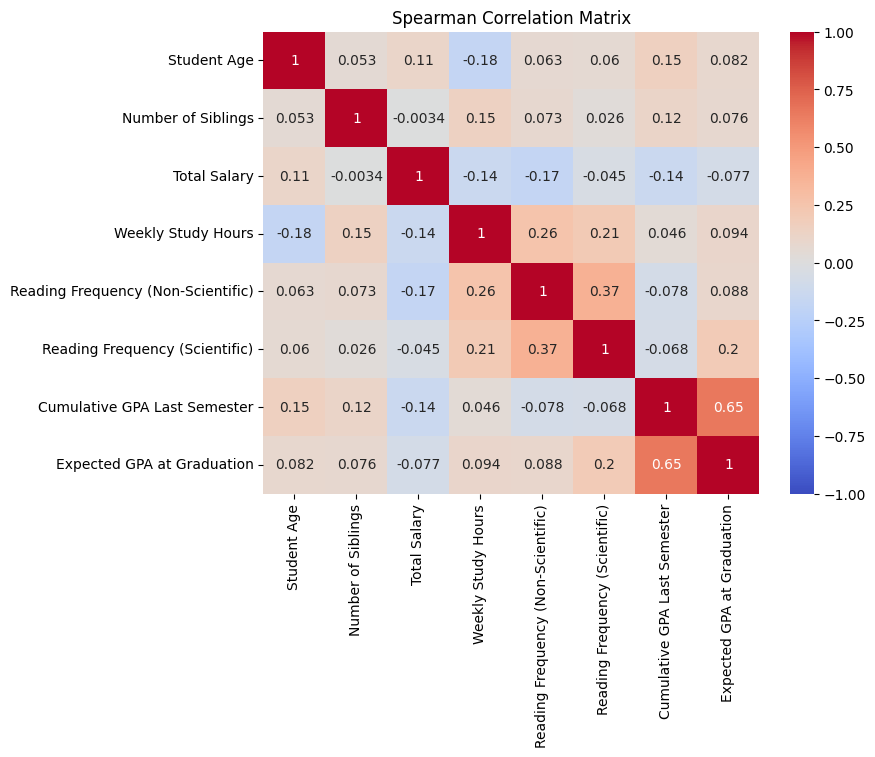

In [ ]:
# Correlacion de Spearman
spearman_corr = df[['Student Age', 'Number of Siblings', 'Total Salary', 'Weekly Study Hours', 'Reading Frequency (Non-Scientific)', 'Reading Frequency (Scientific)',
                    'Cumulative GPA Last Semester',
                    'Expected GPA at Graduation']].corr(method='spearman')

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

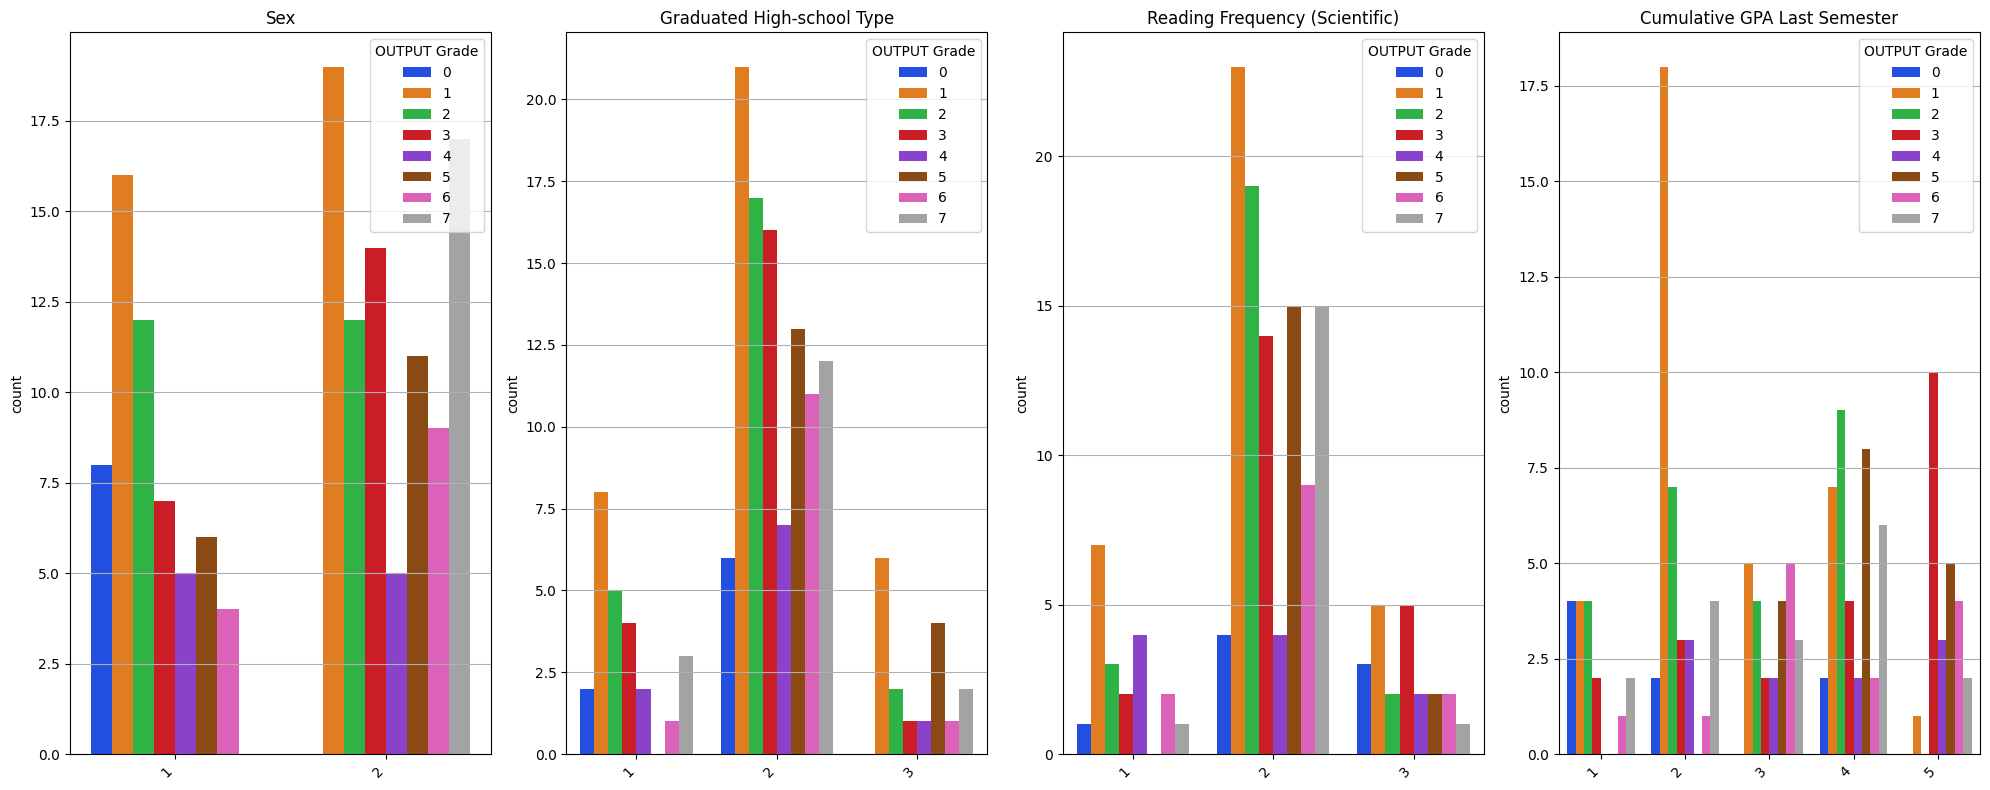

In [ ]:
Columns = ['Sex', 'Graduated High-school Type', 'Reading Frequency (Scientific)', 'Cumulative GPA Last Semester']

fig, axes = plt.subplots(1,4, figsize=(20,8))
axes = axes.ravel() #convertimos la matriz bidimensional en un array unidimensional, una lista de ejes

for col, ax in zip(df[Columns], axes): #col usara la columna actual y ax el eje de esa columna, zip combina las columnas y los ejes
  sns.countplot(x=df[col], ax=ax, palette='bright', hue=df['OUTPUT Grade'] )
  ax.set(title=f'{col}', xlabel=None) #eliminamos etiqueta de eje x
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
  ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Sex", color="OUTPUT Grade", barmode="group", template="plotly_white", title="Distribution of Sex by OUTPUT Grade")
fig.update_traces(marker_line_width=1, opacity=0.7)

fig.update_layout(
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)
fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Aseguramos que las columnas categóricas sean tratadas como tales
df['Sex'] = df['Sex'].astype('category')
df['Graduated High-school Type'] = df['Graduated High-school Type'].astype('category')
df['Reading Frequency (Scientific)'] = df['Reading Frequency (Scientific)'].astype('category')

# Crear figura con subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Sex", "Graduated High-school Type", "Reading Frequency", "Cumulative GPA"))

# Agregar gráficas de barras con barmode="group" para que cada valor de OUTPUT Grade se agrupe en cada categoría de X
fig.add_trace(go.Bar(x=df['Sex'], y=df['Sex'].value_counts(), name='Sex', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(px.histogram(df, x="Sex", color="OUTPUT Grade", barmode="group").data[0], row=1, col=1)

fig.add_trace(go.Bar(x=df['Graduated High-school Type'], y=df['Graduated High-school Type'].value_counts(), name='Graduated High-school Type', marker=dict(color='blue')), row=1, col=2)
fig.add_trace(px.histogram(df, x="Graduated High-school Type", color="OUTPUT Grade", barmode="group").data[0], row=1, col=2)

fig.add_trace(go.Bar(x=df['Reading Frequency (Scientific)'], y=df['Reading Frequency (Scientific)'].value_counts(), name='Reading Frequency', marker=dict(color='blue')), row=2, col=1)
fig.add_trace(px.histogram(df, x="Reading Frequency (Scientific)", color="OUTPUT Grade", barmode="group").data[0], row=2, col=1)

fig.add_trace(go.Bar(x=df['Cumulative GPA Last Semester'], y=df['Cumulative GPA Last Semester'].value_counts(), name='Cumulative GPA', marker=dict(color='blue')), row=2, col=2)
fig.add_trace(px.histogram(df, x="Cumulative GPA Last Semester", color="OUTPUT Grade", barmode="group").data[0], row=2, col=2)

# Ajustar el layout
fig.update_layout(
    title_text="Multiple Variables Comparison",
    showlegend=True,  # Para mostrar la leyenda con los valores de OUTPUT Grade
    barmode='group',  # Agrupación de las barras
)

# Mostrar la figura
fig.show()

In [ ]:
# Librerías para preprocesamiento e ing de características
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Librerías para la canalización
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imblearnPipeline

# Librerías para la regresión
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import metrics

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance


In [ ]:
df.head(2)

,Student Age,Sex,Graduated High-school Type,Scholarship Type,Additional Work,Regular Artistic/Sports Activity,Do you have a Partner,Total Salary,Transportation,Accommodation in Cyprus,...,Attendance to Classes,Preparation to Midterm 1,Preparation to Midterm 2,Taking Notes in Classes,Listening in Classes,Discussion Improves Success,Flip-Classroom,Cumulative GPA Last Semester,Expected GPA at Graduation,OUTPUT Grade
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1


In [ ]:
df["OUTPUT Grade"].unique()

array([1, 2, 5, 0, 3, 4, 7, 6])

In [ ]:
#del df['STUDENT ID']
#del df['COURSE ID']


In [ ]:
X = df.drop('OUTPUT Grade', axis=1)
y = df['OUTPUT Grade']

#Dividimos los datos del conjunto de entrenamiento en 70% y conjunto el prueba 30%
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)#shuffle=True

Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, stratify=ytest, random_state=1)

print("Conjunto de entrenamiento:", Xtrain.shape, ytrain.shape)
print("Conjunto de validacion:", Xval.shape, yval.shape)
print("Conjunto de prueba:", Xtest.shape, ytest.shape)

Conjunto de entrenamiento: (101, 30) (101,)
Conjunto de validacion: (22, 30) (22,)
Conjunto de prueba: (22, 30) (22,)


In [ ]:
from collections import Counter

class_counts = Counter(ytest)
print(class_counts)

Counter({1: 5, 3: 3, 2: 3, 7: 3, 6: 2, 4: 2, 5: 2, 0: 2})


In [ ]:
class_counts = Counter(yval)
print(class_counts)

Counter({1: 6, 2: 4, 5: 3, 3: 3, 7: 2, 6: 2, 4: 1, 0: 1})


Se considera necesario aplicar alguna tecnica de sobremuestre como SMOTE, dependiendo del modelo de clasificacion podriamos aplicar ponderaciones extra a la clase minoritaria

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convertimos las clases de ytrain, yval, ytest en valores numericos

ytrain= label_encoder.fit_transform(ytrain)
yval = label_encoder.transform(yval)
ytest = label_encoder.transform(ytest)


print("ytrain")
for i in range(len(label_encoder.classes_)):
    print(f"Proporcion en clase {i} ({label_encoder.inverse_transform([i])[0]}):", (ytrain == i).mean())

print("yval")
for i in range(len(label_encoder.classes_)):
    print(f"Proporcion en clase {i} ({label_encoder.inverse_transform([i])[0]}):", (yval == i).mean())

print("ytest")
for i in range(len(label_encoder.classes_)):
    print(f"Proporcion en clase {i} ({label_encoder.inverse_transform([i])[0]}):", (ytest == i).mean())

ytrain
Proporcion en clase 0 (0): 0.04950495049504951
Proporcion en clase 1 (1): 0.2376237623762376
Proporcion en clase 2 (2): 0.16831683168316833
Proporcion en clase 3 (3): 0.1485148514851485
Proporcion en clase 4 (4): 0.06930693069306931
Proporcion en clase 5 (5): 0.1188118811881188
Proporcion en clase 6 (6): 0.0891089108910891
Proporcion en clase 7 (7): 0.1188118811881188
yval
Proporcion en clase 0 (0): 0.045454545454545456
Proporcion en clase 1 (1): 0.2727272727272727
Proporcion en clase 2 (2): 0.18181818181818182
Proporcion en clase 3 (3): 0.13636363636363635
Proporcion en clase 4 (4): 0.045454545454545456
Proporcion en clase 5 (5): 0.13636363636363635
Proporcion en clase 6 (6): 0.09090909090909091
Proporcion en clase 7 (7): 0.09090909090909091
ytest
Proporcion en clase 0 (0): 0.09090909090909091
Proporcion en clase 1 (1): 0.22727272727272727
Proporcion en clase 2 (2): 0.13636363636363635
Proporcion en clase 3 (3): 0.13636363636363635
Proporcion en clase 4 (4): 0.09090909090909091

In [ ]:
def add_constant(x):
    return np.where(x == 0, x + 0.00000000000000000000001, x)

numericas_pipeline = Pipeline(steps = [#('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))), # Escalamos los datos al intervalo cerrado [1,2].
                                        ('AgregarConstante', FunctionTransformer(add_constant)),
                                        ('Box-Cox', PowerTransformer(method='box-cox', standardize=False)) #('log', FunctionTransformer(np.log1p)
                                        ])
#list(Xtrain[variables_numericas])

#numericas_pipeline_nombres = ['Student Age', 'Number of Siblings']

# BINARIAS Y NOMINALES:
catOHE_pipeline = Pipeline(steps = [('OneHot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))])
catOHE_pipeline_nombres = ['Sex', 'Graduated High-school Type',
                'Scholarship Type', 'Additional Work', 'Regular Artistic/Sports Activity',
                'Do you have a Partner',  'Transportation',
                'Accommodation in Cyprus', 'Mothers Education', 'Fathers Education',
                 'Parental Status', 'Mothers Occupation',
                'Fathers Occupation',  'Attendance to Seminars', 'Impact on Success',
                'Attendance to Classes', 'Preparation to Midterm 1', 'Preparation to Midterm 2',
                'Taking Notes in Classes', 'Listening in Classes',
                'Discussion Improves Success', 'Flip-Classroom',
                ]

# ORDINALES:
catOrd_pipeline = Pipeline(steps = [('ordinal', OrdinalEncoder())]) #handle_unknown='ignore'
catOrd_pipeline_nombres = ['Student Age', 'Number of Siblings', 'Total Salary', 'Weekly Study Hours', 'Reading Frequency (Non-Scientific)',
                           'Reading Frequency (Scientific)', 'Cumulative GPA Last Semester', 'Expected GPA at Graduation','Student Age', 'Number of Siblings']


# Aplicamos dichas transformaciones a las variables indicadas:

columnasTransformer = ColumnTransformer(transformers = [#('variables_numericas', numericas_pipeline, numericas_pipeline_nombres),
                                                        ('variables_BinariasNominales', catOHE_pipeline, catOHE_pipeline_nombres),
                                                        ('variables_Ordinales', catOrd_pipeline, catOrd_pipeline_nombres),
                                                        ],
                                        remainder='passthrough')

In [ ]:
#Diccionario de hiperparametros

dicc_grid = {
    'modeloRL__penalty': ['l1', 'l2'],
    'modeloRL__C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.10, 0.15, 0.20, 0.50, 1, 5, 10, 100], #regularizacion, entre mas pequeños ayudan a sobreajuste, si es mas grande se ajusta a datos de entrenamiento
    'modeloRL__solver': ['liblinear'], #algoritmo
    'modeloRL__class_weight': ['balanced'], #[{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 5}, {0: 1, 1: 7}, {0: 1, 1: 10}, {0: 1, 1: 15}],     #['balanced']   prestamos mas atencion a la clase minoritaria
    'modeloRL__max_iter': [500, 1000, 1500, 2000, 2500]
}

modeloRL = LogisticRegression()


pipelineRL = Pipeline(steps=[('ct', columnasTransformer),
                             ('modeloRL', modeloRL)])

grid_search = GridSearchCV(pipelineRL, dicc_grid, cv=5, scoring='accuracy') # precision, recall, f1, roc_auc

grid_search.fit(Xtrain, np.ravel(ytrain)) #Evaluamos todas las combinaciones posibles de hiperparametros en el conjunto de entrenamiento, se toma la mejor combinacion que nos de el mejor
                                #Una sola dimension
# Modelo mejorado
modelo_mejorado = grid_search.best_estimator_  #modelo con el transformador
mejores_hiperparametros = grid_search.best_params_

# Mejor modelo que se ha encontrado
modeloRL = modelo_mejorado['modeloRL']


pipelineRL = Pipeline(steps=[('ct',columnasTransformer),('modeloRL',modeloRL)])
pipelineRL.fit(Xtrain, np.ravel(ytrain))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [6, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unk

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('variables_BinariasNominales',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex',
                                                   'Graduated High-school Type',
                                                   'Scholarship Type',
                                                   'Additional Work',
                                                   'Regular Artistic/Sports '
                                                   'Activity',
                                                   'Do you have a Partner',
                                                   'Transportation'...
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Student Age',
                                                   'Number of Siblings',
                                                   'Total Salary',
                                                   'Weekly Study Hours',
                                                   'Reading Frequency '
                                                   '(Non-Scientific)',
                                                   'Reading Frequency '
                                                   '(Scientific)',
                                                   'Cumulative GPA Last '
                                                   'Semester',
                                                   'Expected GPA at Graduation',
                                                   'Student Age',
                                                   'Number of Siblings'])])),
                ('modeloRL',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    max_iter=500, solver='liblinear'))])

In [ ]:
mejores_hiperparametros

{'modeloRL__C': 0.001,
 'modeloRL__class_weight': 'balanced',
 'modeloRL__max_iter': 500,
 'modeloRL__penalty': 'l2',
 'modeloRL__solver': 'liblinear'}

In [ ]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validacion:")

y_pred_trainRL = pipelineRL.predict(Xtrain) #predicciones sobre el conjunto de entrenamiento
y_pred_valRL = pipelineRL.predict(Xval)  #predicciones sobre el conjunto de validacion

print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainRL))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valRL))

print("\n>>Matriz de Confusion:")
print(metrics.confusion_matrix(yval, y_pred_valRL))

print("\n>>Varias metricas:")
print(metrics.classification_report(yval, y_pred_valRL))  #array([5, 6, 7, 4, 8, 3, 9])

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validacion:
accuracy-train 0.33663366336633666
accuracy-val 0.18181818181818182

>>Matriz de Confusion:
[[0 0 1 0 0 0 0 0]
 [0 2 0 4 0 0 0 0]
 [0 1 0 1 0 2 0 0]
 [0 0 0 1 0 2 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 0]
 [0 1 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0]]

>>Varias metricas:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.33      0.31         6
           2       0.00      0.00      0.00         4
           3       0.12      0.33      0.18         3
           4       0.00      0.00      0.00         1
           5       0.17      0.33      0.22         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.18        22
   macro avg       0.07      0.12      0.09        22
weighted avg       0.12      0.18      0.14        22



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set

In [ ]:
dicc_grid = {
    'modeloKNN__n_neighbors' :[1,3,5,7,9,11,13],
    'modeloKNN__weights':['uniform', 'distance'],
    'modeloKNN__metric':['euclidean', 'manhattan'],
    'modeloKNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

modeloKNN = KNeighborsClassifier()


pipelineKNN = Pipeline(steps=[('ct', columnasTransformer),
                             ('modeloKNN', modeloKNN)])

grid_search = GridSearchCV(pipelineKNN, param_grid=dicc_grid, cv=5)

grid_search.fit(Xtrain, np.ravel(ytrain)) #Evaluamos todas las combinaciones posibles de hiperparametros en el conjunto de entrenamiento, se toma la mejor combinacion que nos de el mejor
                                #Una sola dimension
# Modelo mejorado
modelo_mejoradoKNN = grid_search.best_estimator_  #aqui tenemos nuestro MODELO con el transformador
mejores_hiperparametrosKNN = grid_search.best_params_

# Mejor modelo que se ha encontrado
modeloKNN = modelo_mejoradoKNN['modeloKNN']

pipelineKNN = Pipeline(steps=[('ct',columnasTransformer),('modeloKNN',modeloKNN)])
pipelineKNN.fit(Xtrain, np.ravel(ytrain))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [6, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unk

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('variables_BinariasNominales',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex',
                                                   'Graduated High-school Type',
                                                   'Scholarship Type',
                                                   'Additional Work',
                                                   'Regular Artistic/Sports '
                                                   'Activity',
                                                   'Do you have a Partner',
                                                   'Transportation'...
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Student Age',
                                                   'Number of Siblings',
                                                   'Total Salary',
                                                   'Weekly Study Hours',
                                                   'Reading Frequency '
                                                   '(Non-Scientific)',
                                                   'Reading Frequency '
                                                   '(Scientific)',
                                                   'Cumulative GPA Last '
                                                   'Semester',
                                                   'Expected GPA at Graduation',
                                                   'Student Age',
                                                   'Number of Siblings'])])),
                ('modeloKNN',
                 KNeighborsClassifier(algorithm='ball_tree', metric='manhattan',
                                      weights='distance'))])

In [ ]:
mejores_hiperparametrosKNN

{'modeloKNN__algorithm': 'ball_tree',
 'modeloKNN__metric': 'manhattan',
 'modeloKNN__n_neighbors': 5,
 'modeloKNN__weights': 'distance'}

In [ ]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validacion:")

y_pred_trainKNN = pipelineKNN.predict(Xtrain) #predicciones sobre el conjunto de entrenamiento
y_pred_valKNN = pipelineKNN.predict(Xval)  #predicciones sobre el conjunto de validacion

print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainKNN))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valKNN))

print("\n>>Matriz de Confusion:")
print(metrics.confusion_matrix(yval, y_pred_valKNN))

print("\n>>Reporte varias metricas:")
print(metrics.classification_report(yval, y_pred_valKNN))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validacion:
accuracy-train 1.0
accuracy-val 0.36363636363636365

>>Matriz de Confusion:
[[0 0 1 0 0 0 0 0]
 [0 2 2 1 0 0 1 0]
 [0 2 1 0 0 1 0 0]
 [0 0 0 2 0 1 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0]
 [0 1 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1]]

>>Reporte varias metricas:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.33      0.31         6
           2       0.20      0.25      0.22         4
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         1
           5       0.50      0.67      0.57         3
           6       0.00      0.00      0.00         2
           7       0.50      0.50      0.50         2

    accuracy                           0.36        22
   macro avg       0.27      0.30      0.28        22
weighted avg       0.32      0.36      0.34        22



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set

In [ ]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")

y_pred_trainRLbsm = pipelineRLbsm.predict(Xtrain) #predicciones sobre el conjunto de entrenamiento
y_pred_valRLbsm = pipelineRLbsm.predict(Xval)  #predicciones sobre el conjunto de validacion

print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainRLbsm))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valRLbsm))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valRLbsm))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valRLbsm))